In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
dataset = pd.read_csv('Placement_Data_Full_Class.csv')

In [76]:
# as salary and sl_no columns are not required for placement status prediction so we drop it
dataset.drop(['salary','sl_no'], axis=1, inplace=True)

In [77]:
features_to_split = ['hsc_s','degree_t']
for feature in features_to_split:
    dummy = pd.get_dummies(dataset[feature])
    dataset = pd.concat([dataset, dummy], axis=1)
    dataset.drop(feature, axis=1, inplace=True)


In [78]:
dataset.rename(columns={"Others": "Other_Degree"},inplace=True)

In [79]:
encoder = LabelEncoder() # to encode string to the values like 0,1,2 etc.

In [80]:
columns_to_encode = ['gender','ssc_b', 'hsc_b','workex','specialisation','status']
for column in columns_to_encode:
    dataset[column] = encoder.fit_transform(dataset[column])



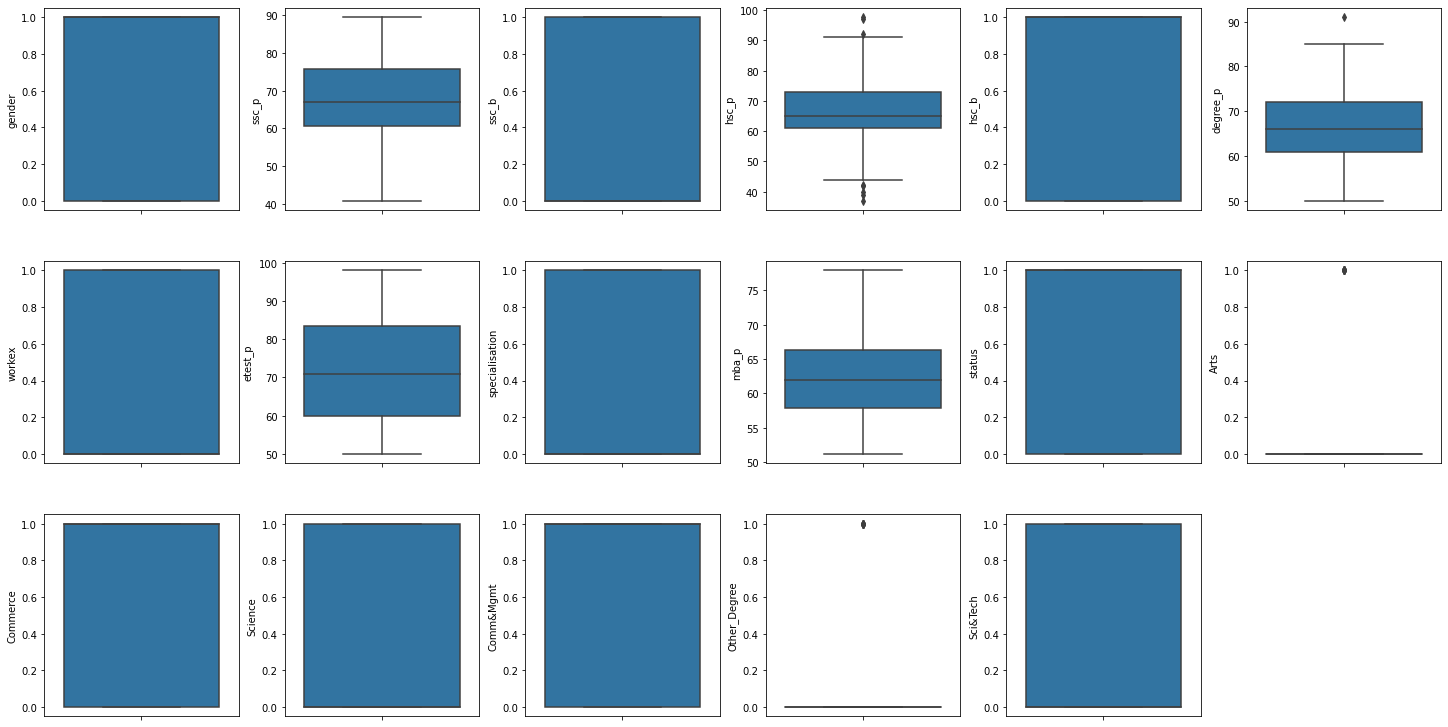

In [81]:
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) # for styling by giving padding

In [82]:
dataset = dataset[~(dataset['degree_p']>=90)]
dataset = dataset[~(dataset['hsc_p']>=95)]

In [83]:
dataset.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
gender,1.000000,-0.059818,0.017052,-0.022187,0.074438,-0.154679,0.093325,0.081765,-0.103355,-0.298466,0.098189,-0.096386,0.001870,0.041426,-0.036801,-0.096386,0.086960
ssc_p,-0.059818,1.000000,0.107995,0.528111,0.056672,0.528753,0.183073,0.264009,-0.177436,0.377438,0.605381,-0.194514,-0.093283,0.181772,-0.168282,-0.063459,0.208907
ssc_b,0.017052,0.107995,1.000000,-0.140332,0.608493,0.020828,-0.027916,-0.018739,-0.057356,0.074653,0.033717,-0.001410,-0.042586,0.043708,-0.078842,-0.001410,0.083707
hsc_p,-0.022187,0.528111,-0.140332,1.000000,-0.038259,0.443595,0.135144,0.208809,-0.222405,0.335610,0.499777,-0.074931,0.267073,-0.236466,0.121441,-0.132137,-0.061747
hsc_b,0.074438,0.056672,0.608493,-0.038259,1.000000,0.043618,0.039061,0.031316,0.004762,0.073936,0.009393,-0.114855,-0.069985,0.122407,-0.019492,-0.114855,0.077977
degree_p,-0.154679,0.528753,0.020828,0.443595,0.043618,1.000000,0.135100,0.226353,-0.232618,0.376261,0.479557,-0.153777,-0.005676,0.074850,-0.004369,-0.180476,0.094883
workex,0.093325,0.183073,-0.027916,0.135144,0.039061,0.135100,1.000000,0.052862,-0.187200,0.174951,0.279091,0.054259,-0.070916,0.047346,-0.118781,0.009501,0.120296
etest_p,0.081765,0.264009,-0.018739,0.208809,0.031316,0.226353,0.052862,1.000000,-0.222765,0.203663,0.122770,-0.073539,-0.023192,0.056508,-0.010486,0.009482,0.006296
specialisation,-0.103355,-0.177436,-0.057356,-0.222405,0.004762,-0.232618,-0.187200,-0.222765,1.000000,-0.100456,-0.251043,-0.080368,-0.126684,0.164258,-0.098640,0.090868,0.058387
mba_p,-0.298466,0.377438,0.074653,0.335610,0.073936,0.376261,0.174951,0.203663,-0.100456,1.000000,0.063197,0.009640,-0.040704,0.036839,-0.087109,-0.031441,0.107435


<AxesSubplot:>

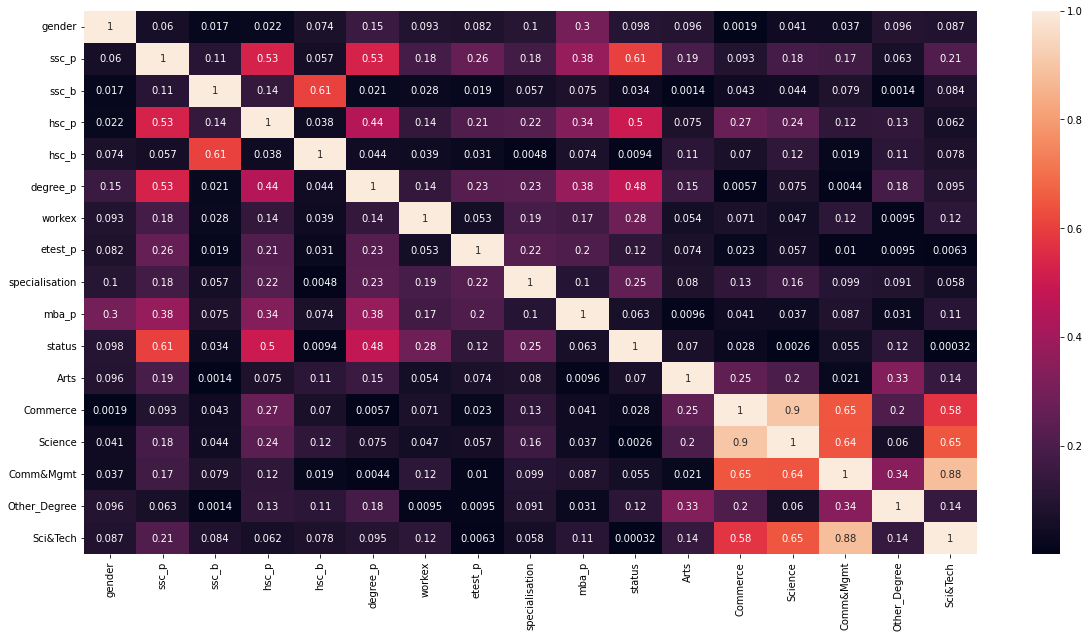

In [84]:
# heatmap for checking correlation or linearity

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)

In [85]:
col1 = dataset["Comm&Mgmt"]
col2 = dataset ["Sci&Tech"]

In [86]:
col1

0      0
1      0
2      1
3      0
4      1
      ..
210    1
211    0
212    1
213    1
214    1
Name: Comm&Mgmt, Length: 212, dtype: uint8

In [87]:
col2

0      1
1      1
2      0
3      1
4      0
      ..
210    0
211    1
212    0
213    0
214    0
Name: Sci&Tech, Length: 212, dtype: uint8

In [88]:
correlation = col1.corr(col2)

In [89]:
correlation

-0.8824667858245382

In [90]:


id1 = "Comm&Mgmt"
id2 = "Sci&Tech"
column_1 = dataset[id1]
column_2 = dataset[id2]
correlation = column_1.corr(column_2)

for i in range(500):
    idx = random.randint(0, 200)
    
    t1 = bool(random.randint(0, 1))
    
    row = dataset.iloc[idx]
    
    
    
    dataset = dataset.append(row, ignore_index=True)
    if (t1):
        row[id1]+=correlation
        row[id2]-=correlation
    else:
        row[id1]-=correlation
        row[id2]+=correlation

# dataset = dataset.append(row, ignore_index=False, verify_integrity=False, sort=None)
    


C:\Users\neera\AppData\Local\Temp\ipykernel_24012\2610585442.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(row, ignore_index=True)
C:\Users\neera\AppData\Local\Temp\ipykernel_24012\2610585442.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(row, ignore_index=True)
C:\Users\neera\AppData\Local\Temp\ipykernel_24012\2610585442.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(row, ignore_index=True)
C:\Users\neera\AppData\Local\Temp\ipykernel_24012\2610585442.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(row, ignore_inde

In [91]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1.0,67.00,1.0,91.00,1.0,58.00,0.0,55.0,1.0,58.80,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,79.33,0.0,78.33,1.0,77.48,1.0,86.5,0.0,66.28,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,65.00,0.0,68.00,0.0,64.00,0.0,75.0,0.0,57.80,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,56.00,0.0,52.00,0.0,52.00,0.0,66.0,1.0,59.43,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,85.80,0.0,73.60,0.0,73.30,0.0,96.8,0.0,55.50,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,77.00,1.0,75.00,1.0,73.00,0.0,80.0,0.0,67.05,1.0,0.0,0.0,1.0,0.0,0.0,1.0
708,1.0,70.00,0.0,63.00,1.0,70.00,1.0,55.0,0.0,62.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0
709,1.0,65.20,0.0,61.40,0.0,64.80,1.0,93.4,0.0,57.34,1.0,0.0,1.0,0.0,1.0,0.0,0.0
710,1.0,54.20,0.0,63.00,1.0,58.00,0.0,79.0,1.0,58.44,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [92]:
dataset.shape

(712, 17)

<AxesSubplot:>

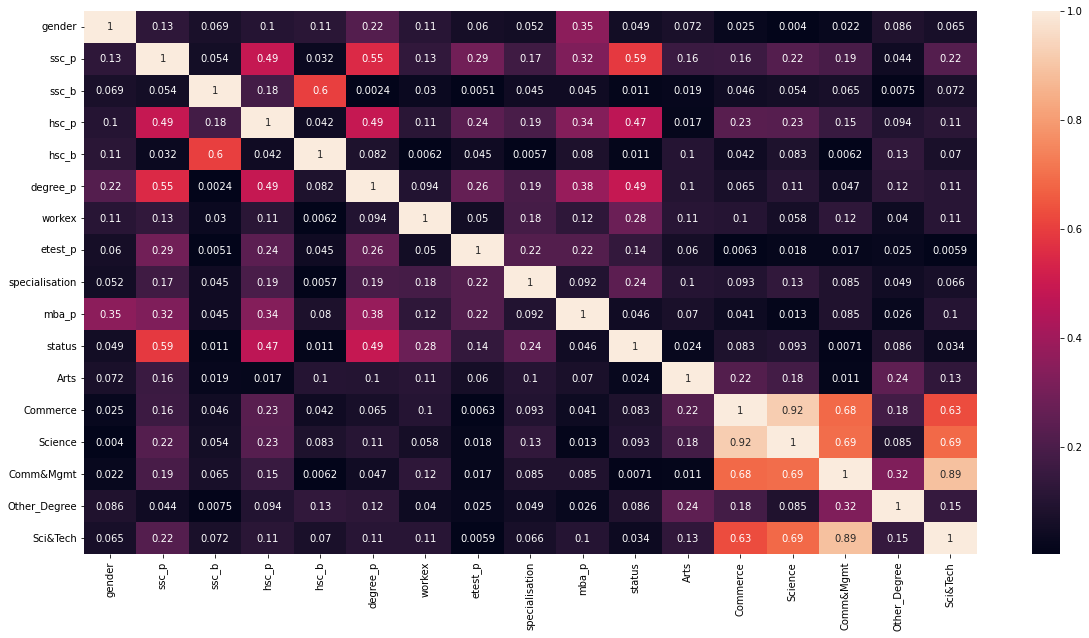

In [93]:
# heatmap for checking correlation or linearity

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)

In [94]:


id1 = "Arts"
id2 = "Commerce"
column_1 = dataset[id1]
column_2 = dataset[id2]
correlation = column_1.corr(column_2)

for i in range(500):
    idx = random.randint(0, 200)
    
    t1 = bool(random.randint(0, 1))
    
    row = dataset.iloc[idx]
    
    
    
    dataset = dataset.append(row, ignore_index=True)
    if (t1):
        row[id1]+=correlation
        row[id2]-=correlation
    else:
        row[id1]-=correlation
        row[id2]+=correlation

# dataset = dataset.append(row, ignore_index=False, verify_integrity=False, sort=None)
    


C:\Users\neera\AppData\Local\Temp\ipykernel_24012\863712179.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(row, ignore_index=True)
C:\Users\neera\AppData\Local\Temp\ipykernel_24012\863712179.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[id1]+=correlation
C:\Users\neera\AppData\Local\Temp\ipykernel_24012\863712179.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[id2]-=correlation
C:\Users\neera\AppData\Local\Temp\ipykernel_24012\863712179.py:16: FutureWarning: The frame.append method

<AxesSubplot:>

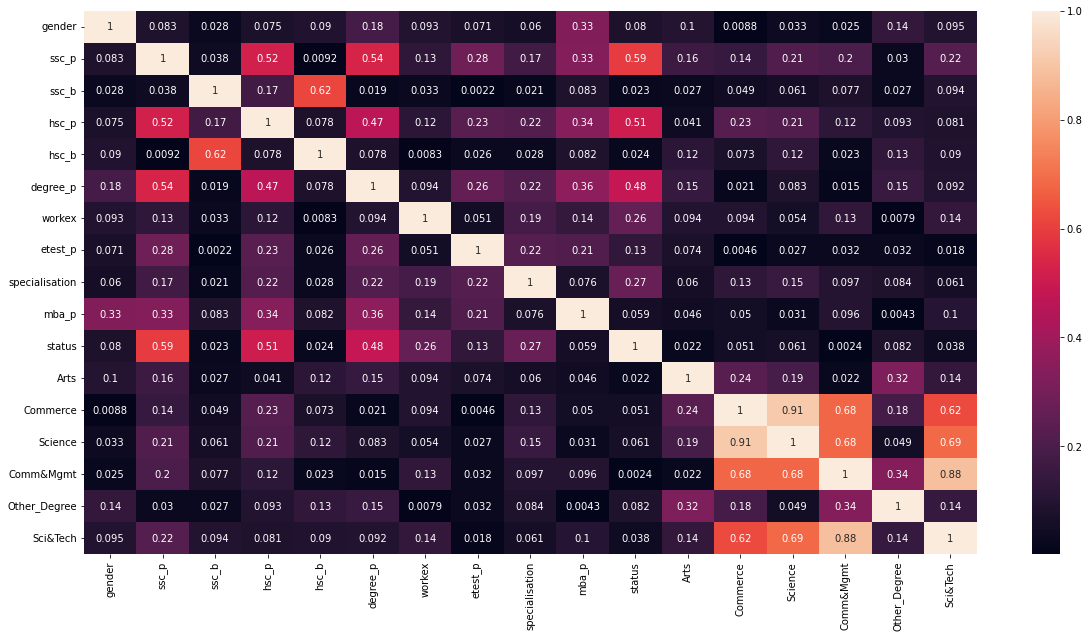

In [95]:
# heatmap for checking correlation or linearity

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)

In [97]:
dataset.shape

(1212, 17)

In [96]:
dataset.to_csv("dataset.csv", index = False)